In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# naming the columns for the dataframes
columns = ['z(km)', 'p(mb)', 'T(°C)', 'air density(m-3)', 'o3(m-3)', 'o2(m-3)', 'h2o(m-3)', 'co2(m-3)', 'no2(m-3)']

In [28]:
# import data
trop = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglt.dat', delimiter=r"\s+", engine="python", skiprows=2, names=columns)
midsum = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglms.dat', delimiter=r"\s+", engine="python", skiprows=2, names=columns)
midwin = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglmw.dat', delimiter=r"\s+", engine="python", skiprows=2, names=columns)
subarcs = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglss.dat', delimiter=r"\s+", engine="python", skiprows=2, names=columns)
subarcw = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglsw.dat', delimiter=r"\s+", engine="python", skiprows=2, names=columns) 

In [29]:
# converting kelvin to celsius and cm-3 to m-3
for file in [trop, midsum, midwin, subarcs, subarcw]:
    file['T(°C)'] = file['T(°C)'] - 273.15 
    file['air density(m-3)'] = file['air density(m-3)'] / 1000000 
    file['o3(m-3)'] = file['o3(m-3)'] / 1000000
    file['o2(m-3)'] = file['o2(m-3)'] / 1000000
    file['h2o(m-3)'] = file['h2o(m-3)'] / 1000000
    file['co2(m-3)'] = file['co2(m-3)'] / 1000000
    file['no2(m-3)'] = file['no2(m-3)'] / 1000000

In [5]:
trop.head()

,z(km),p(mb),T(°C),air density(m-3),o3(m-3),o2(m-3),h2o(m-3),co2(m-3),no2(m-3)
0,120.0,0.00002,106.85,428855.2,0.000211,30631.25,0.084500,14.7875,0.000064
1,115.0,0.00004,26.55,870016.7,0.004353,81836.40,0.208944,34.8240,0.000135
2,110.0,0.00006,-31.55,1939631.0,0.097050,232920.00,0.543480,116.4600,0.000309
3,105.0,0.00013,-61.15,4441394.0,0.889000,622300.00,1.511300,488.9500,0.000729
4,100.0,0.00029,-82.45,10976380.0,4.392000,1756800.00,4.392000,2141.1000,0.001867


In [6]:
# functions for the graphs, yes i know i could just make one with more args but i prefer it this way

def pressure(file, title):
    plt.figure(figsize=(5,5))
    plt.plot(file['p(mb)'],file['z(km)'], markersize = 1)
    plt.xlabel("pressure (mb)",fontsize = 14)
    plt.ylabel("height (km)",fontsize = 14)
    plt.title(label=title,fontsize = 15)
    plt.grid()
    
def temp(file,title):
    plt.figure(figsize=(5,5))
    plt.plot(file['T(°C)'],file['z(km)'], markersize = 1)
    plt.xlabel("temperature(°C)",fontsize = 14)
    plt.ylabel("height (km)",fontsize = 14)
    plt.title(label=title,fontsize = 15)
    plt.grid()
    
def gases(file,filegas,xlabel,title):
    plt.figure(figsize=(5,5))
    plt.plot(filegas,file['z(km)'], markersize = 1)
    plt.xlabel(xlabel,fontsize = 14)
    plt.ylabel("height (km)",fontsize = 14)
    plt.title(label=title,fontsize = 15)
    plt.grid()
    
def distribution(file,fraction, ylim, xlabel, title):
    plt.figure(figsize=(5,5))
    plt.plot(fraction,file['z(km)'], markersize = 1)
    plt.ylim(0,ylim)
    plt.xlabel(xlabel,fontsize = 14)
    plt.ylabel("height (km)",fontsize = 14)
    plt.title(label=title,fontsize = 14)
    plt.grid()

In [7]:
# Integration function that returns a list containing the 6 values of total amount of each atmospheric variable 

def integration(file):
    variables = ['air density(m-3)', 'o3(m-3)', 'o2(m-3)', 'h2o(m-3)', 'co2(m-3)', 'no2(m-3)']
    result = []
    for i in variables:
        total = 1000 * np.trapz(file[i], file['z(km)'])   
        result.append(total)

    return result

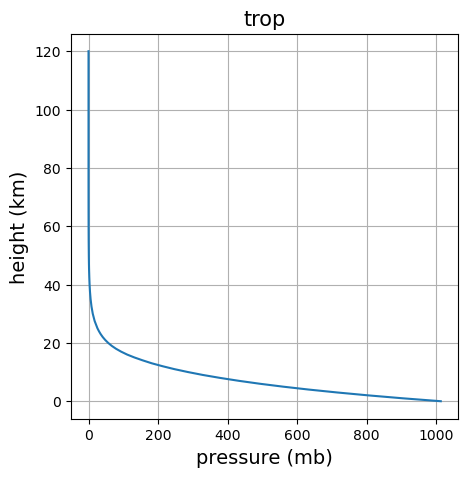

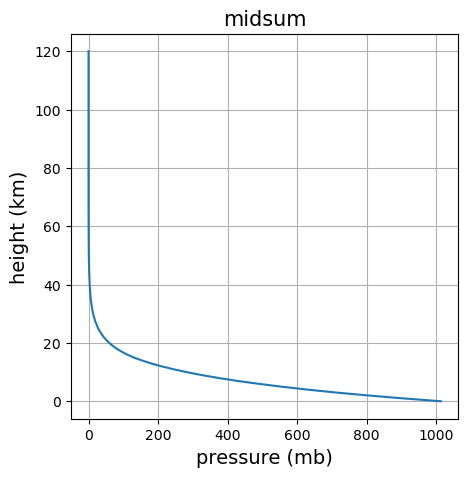

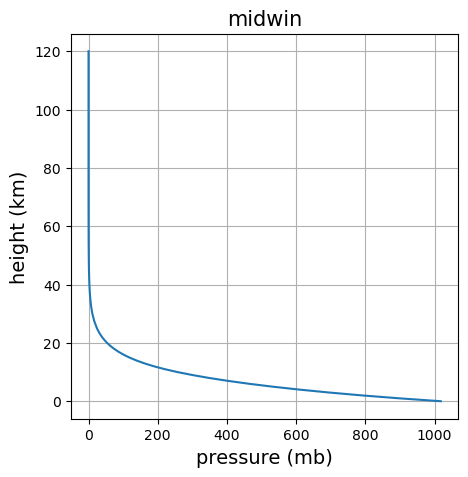

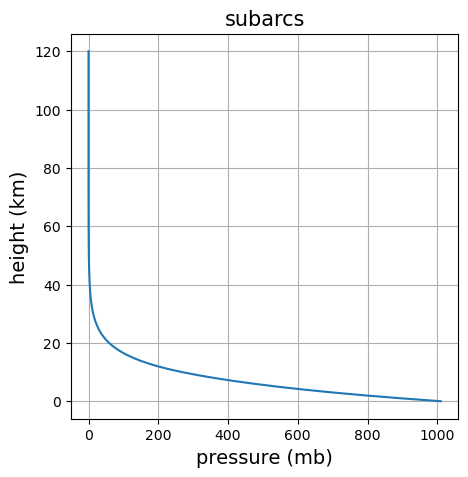

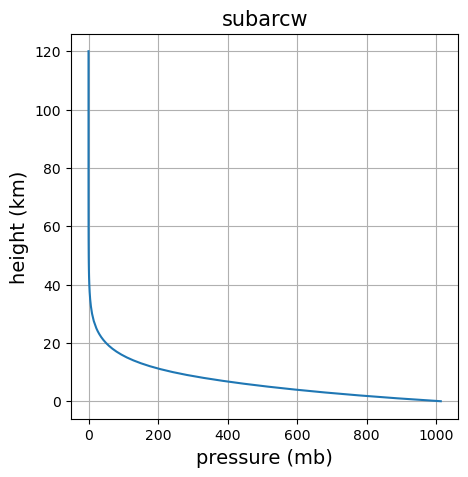

In [8]:
# pressure graphs -> exponential graph

pressure(trop,"trop")
pressure(midsum,'midsum')
pressure(midwin, 'midwin')
pressure(subarcs, 'subarcs')
pressure(subarcw, 'subarcw')

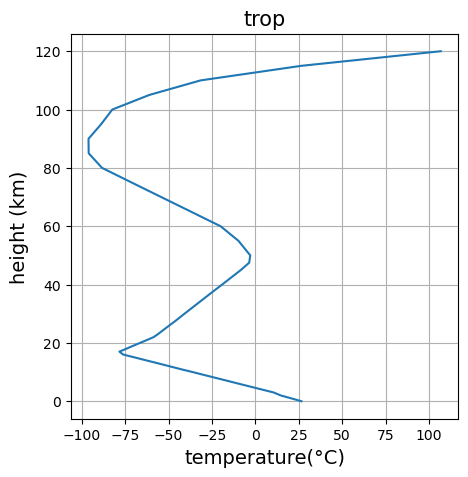

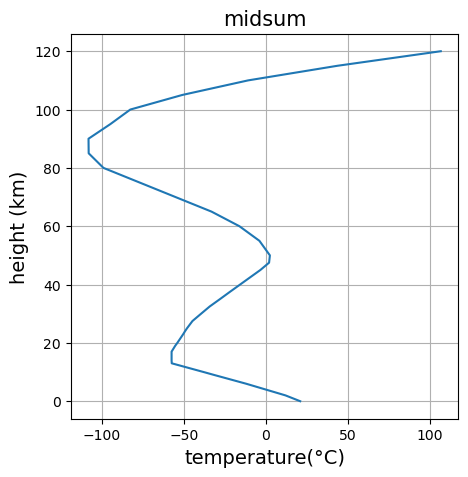

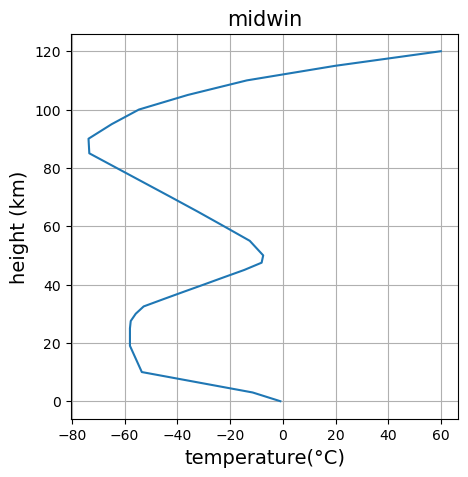

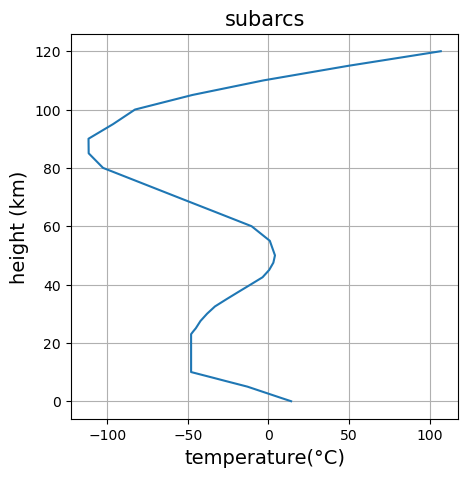

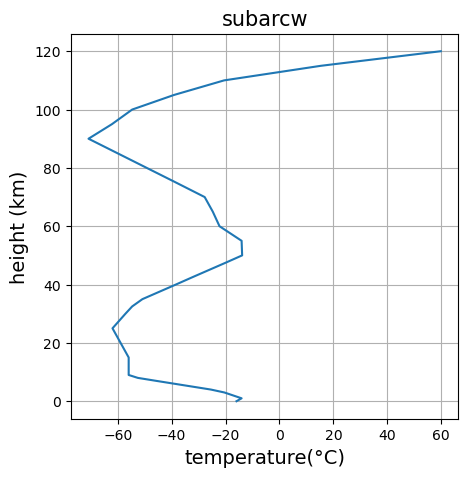

In [9]:
# temperature graphs -> they show where the tropopause is 

temp(trop,"trop")
temp(midsum,'midsum')
temp(midwin, 'midwin')
temp(subarcs, 'subarcs')
temp(subarcw, 'subarcw')

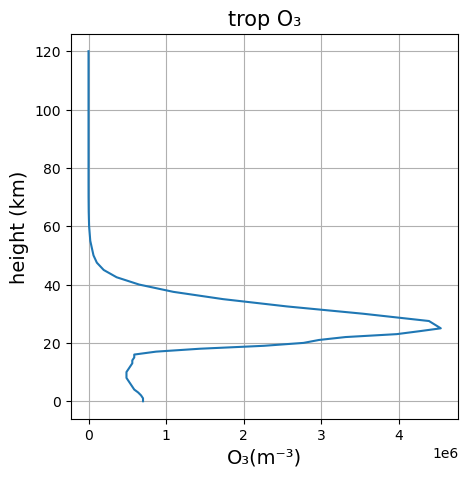

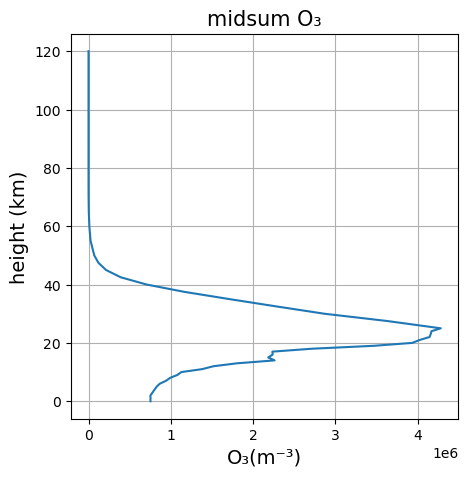

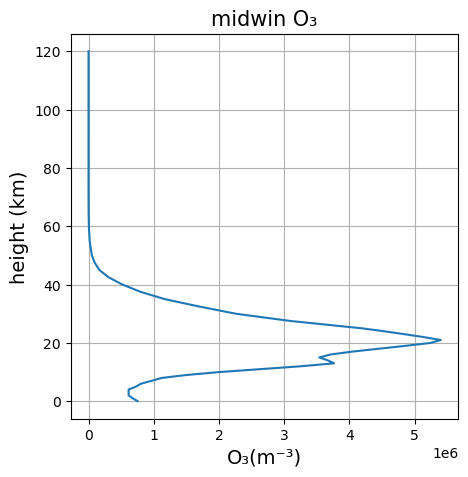

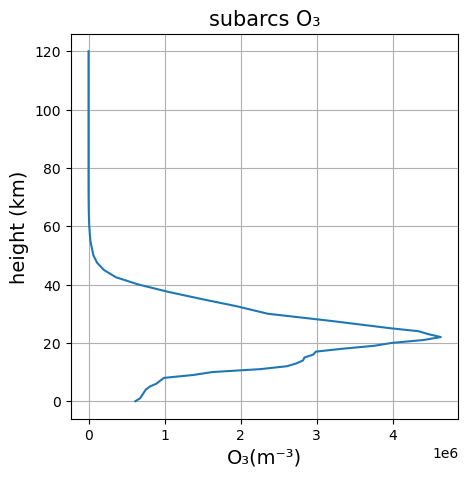

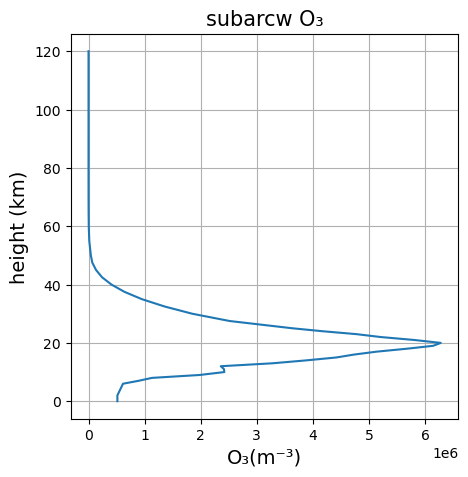

In [10]:
# ozone -> Total ozone is generally lowest at the equator and highest in polar regions. During spring, 
#total ozone exhibits maximums at latitudes poleward of about 45° N in the Northern Hemisphere
#and between 45° and 60° S in the Southern Hemisphere. These spring maximums are a result of increased transport 
#of ozone from its source region in the tropics toward high latitudes during late autumn and winter.

gases(trop, trop['o3(m-3)'],'O₃(m⁻³)', "trop O₃")
gases(midsum, midsum['o3(m-3)'], 'O₃(m⁻³)', 'midsum O₃')
gases(midwin, midwin['o3(m-3)'], 'O₃(m⁻³)', 'midwin O₃')
gases(subarcs, subarcs['o3(m-3)'], 'O₃(m⁻³)', 'subarcs O₃')
gases(subarcw, subarcw['o3(m-3)'], 'O₃(m⁻³)', 'subarcw O₃')

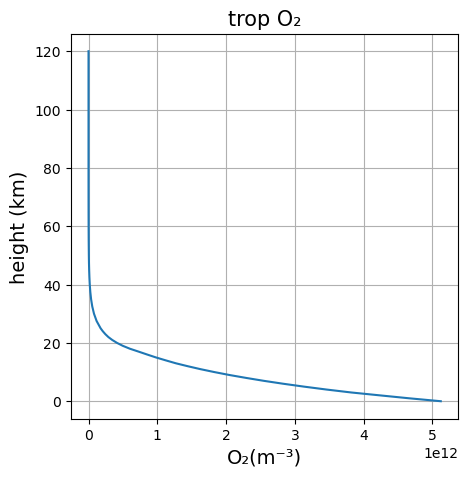

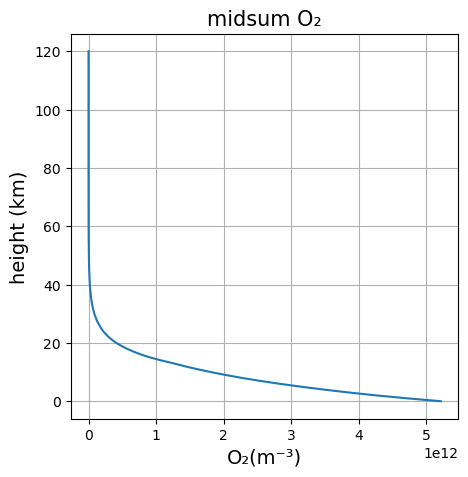

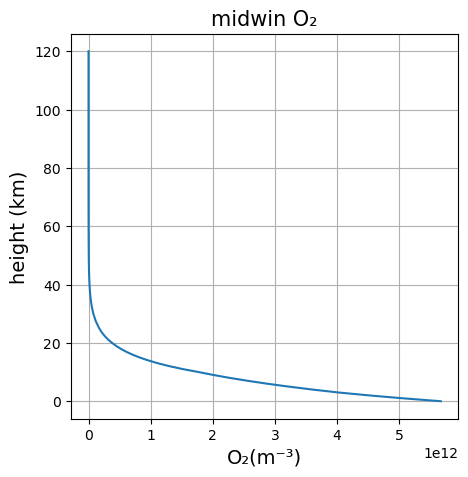

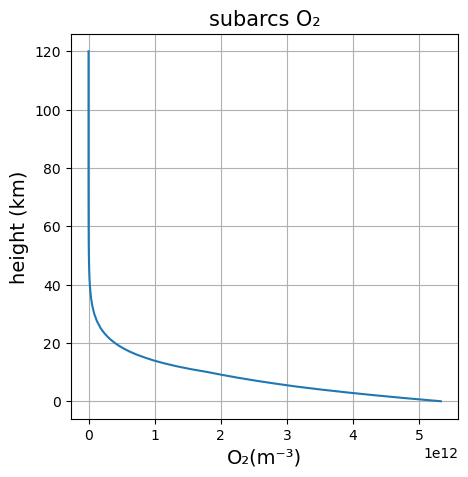

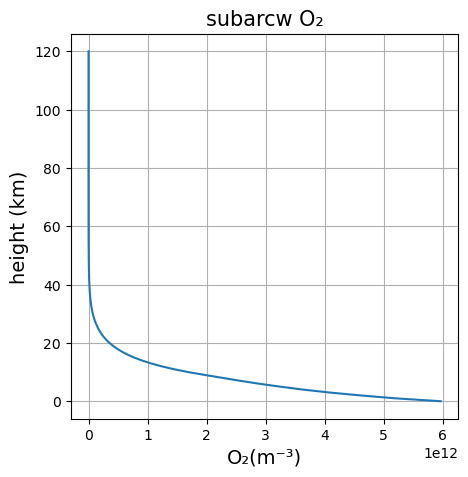

In [11]:
#oxygen -> water molecules with heavy 18-O isotopes in them condense more easily than normal water molecules, 
#air becomes progressively depleted in 18-O as it travels to high latitudes and becomes colder and drier.

gases(trop, trop['o2(m-3)'],'O₂(m⁻³)', "trop O₂")
gases(midsum, midsum['o2(m-3)'], 'O₂(m⁻³)', 'midsum O₂')
gases(midwin, midwin['o2(m-3)'], 'O₂(m⁻³)', 'midwin O₂')
gases(subarcs, subarcs['o2(m-3)'], 'O₂(m⁻³)', 'subarcs O₂')
gases(subarcw, subarcw['o2(m-3)'], 'O₂(m⁻³)', 'subarcw O₂')

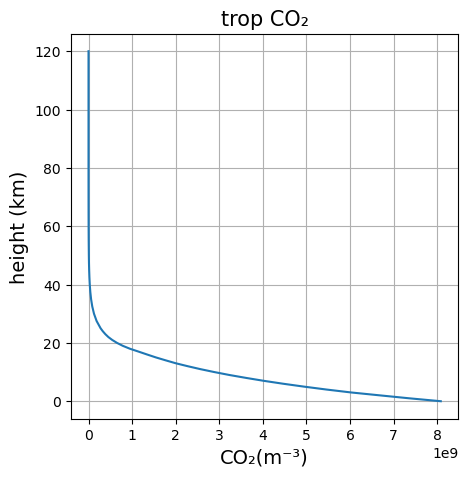

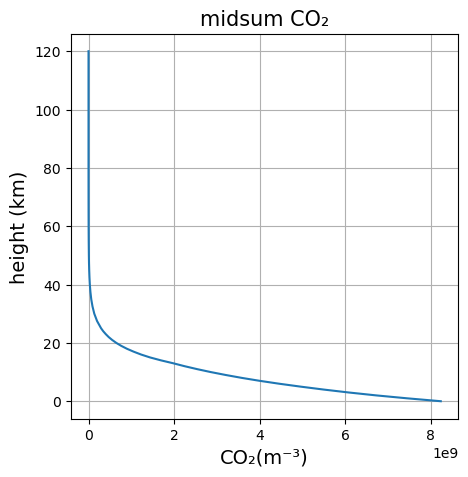

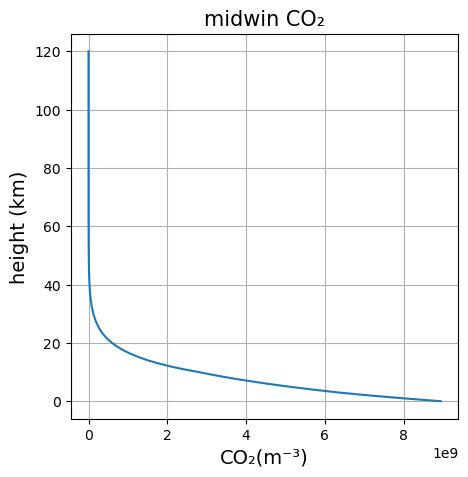

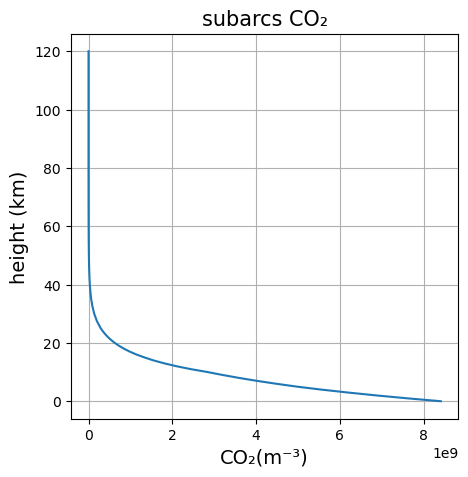

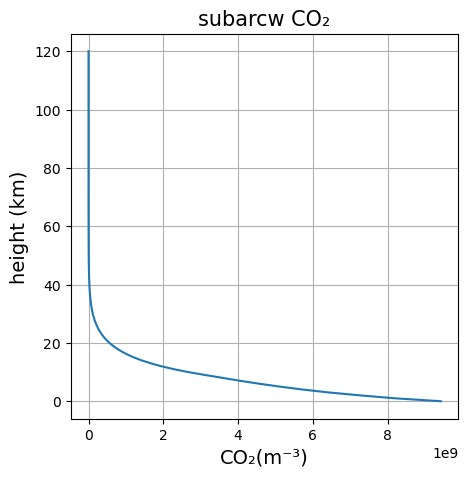

In [12]:
# co2 -> strong seasonal CO2 fluctuations throughout the Northern Hemisphere 
#and weaker fluctuations near the equator and in the Southern Hemisphere.

gases(trop, trop['co2(m-3)'],'CO₂(m⁻³)', "trop CO₂")
gases(midsum, midsum['co2(m-3)'], 'CO₂(m⁻³)', 'midsum CO₂')
gases(midwin, midwin['co2(m-3)'], 'CO₂(m⁻³)', 'midwin CO₂')
gases(subarcs, subarcs['co2(m-3)'], 'CO₂(m⁻³)', 'subarcs CO₂')
gases(subarcw, subarcw['co2(m-3)'], 'CO₂(m⁻³)', 'subarcw CO₂')

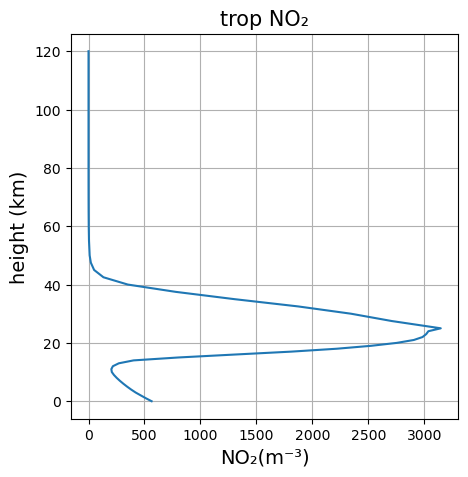

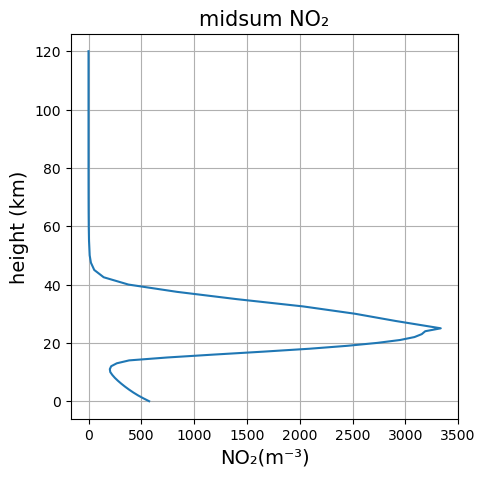

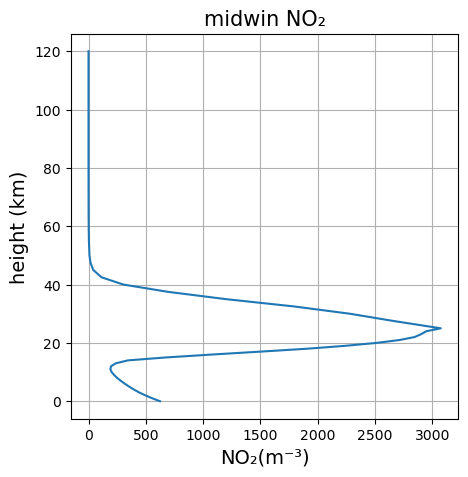

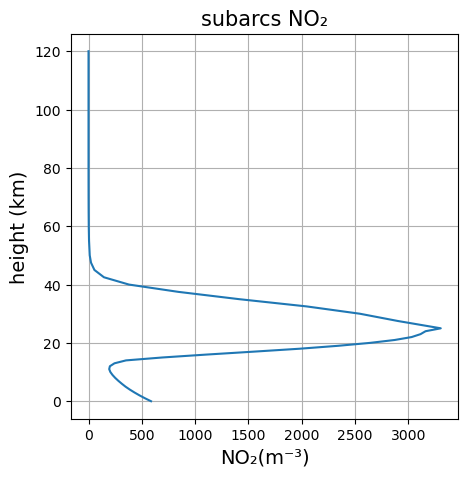

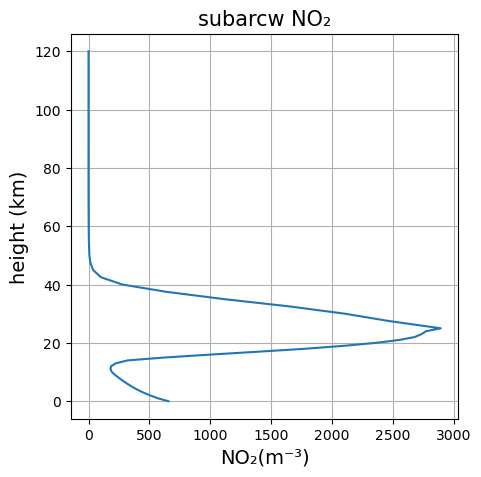

In [13]:
# no2 -> Winter levels are typically higher than those in summer

gases(trop, trop['no2(m-3)'],'NO₂(m⁻³)', "trop NO₂")
gases(midsum, midsum['no2(m-3)'], 'NO₂(m⁻³)', 'midsum NO₂')
gases(midwin, midwin['no2(m-3)'], 'NO₂(m⁻³)', 'midwin NO₂')
gases(subarcs, subarcs['no2(m-3)'], 'NO₂(m⁻³)', 'subarcs NO₂')
gases(subarcw, subarcw['no2(m-3)'], 'NO₂(m⁻³)', 'subarcw NO₂')

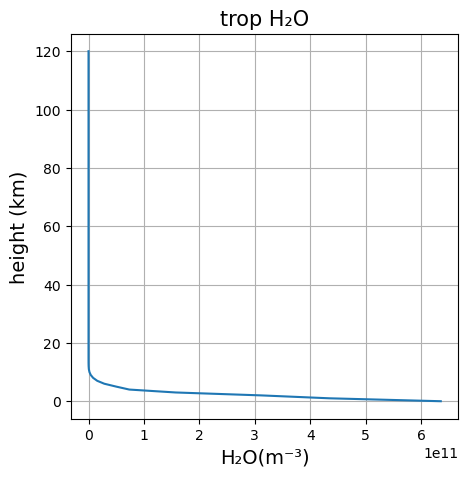

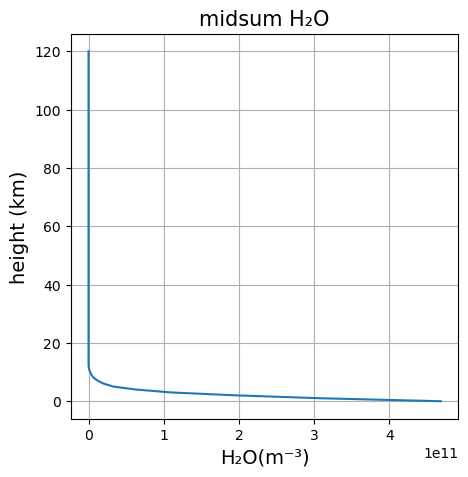

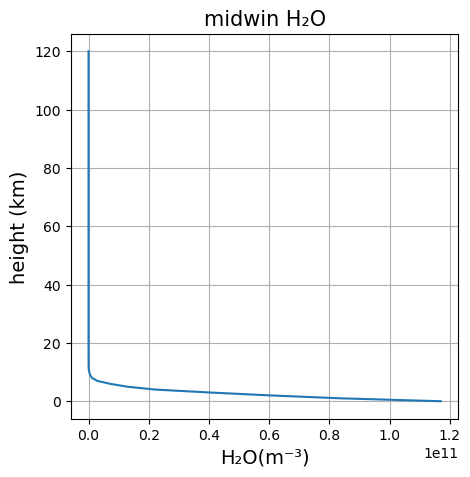

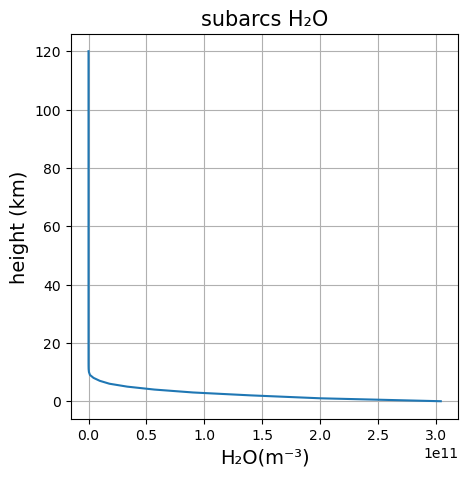

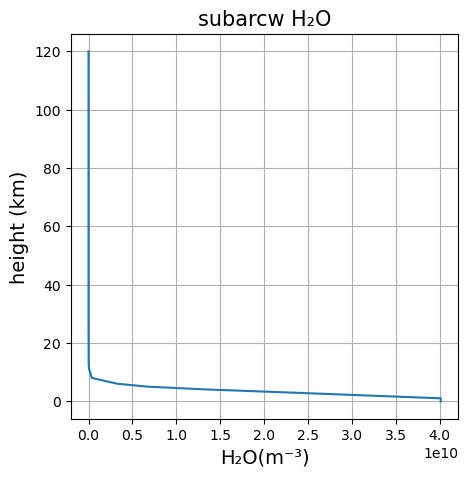

In [14]:
# water 

gases(trop, trop['h2o(m-3)'],'H₂O(m⁻³)', "trop H₂O")
gases(midsum, midsum['h2o(m-3)'], 'H₂O(m⁻³)', 'midsum H₂O')
gases(midwin, midwin['h2o(m-3)'], 'H₂O(m⁻³)', 'midwin H₂O')
gases(subarcs, subarcs['h2o(m-3)'], 'H₂O(m⁻³)', 'subarcs H₂O')
gases(subarcw, subarcw['h2o(m-3)'], 'H₂O(m⁻³)', 'subarcw H₂O')

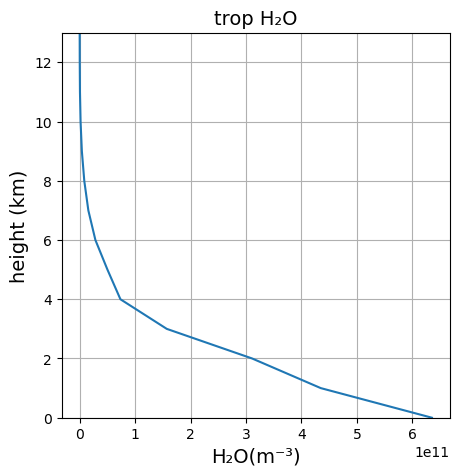

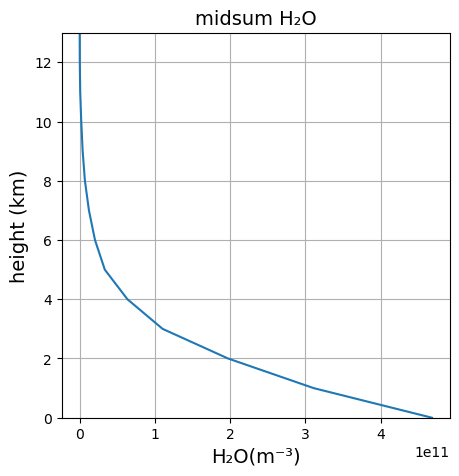

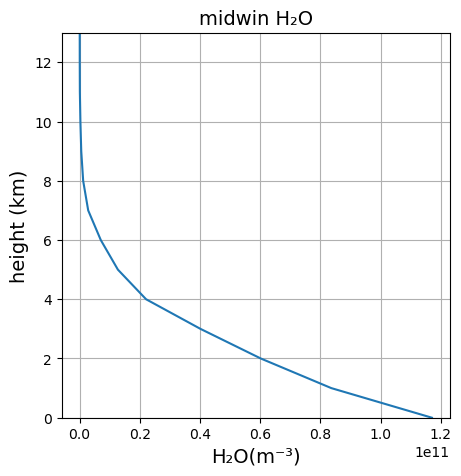

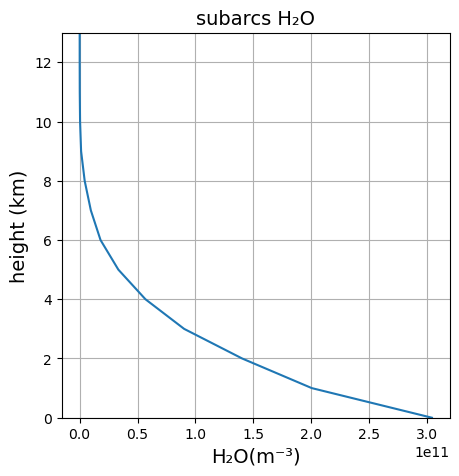

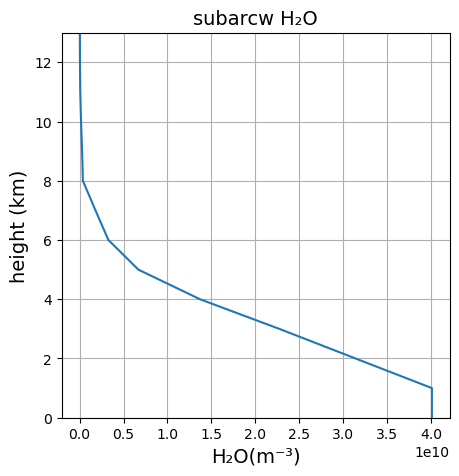

In [15]:
# water distribution in the first 20 km
distribution(trop,trop['h2o(m-3)'], 13,'H₂O(m⁻³)','trop H₂O')
distribution(midsum,midsum['h2o(m-3)'], 13,'H₂O(m⁻³)','midsum H₂O')
distribution(midwin,midwin['h2o(m-3)'], 13,'H₂O(m⁻³)','midwin H₂O')
distribution(subarcs,subarcs['h2o(m-3)'], 13,'H₂O(m⁻³)','subarcs H₂O')
distribution(subarcw,subarcw['h2o(m-3)'],13,'H₂O(m⁻³)','subarcw H₂O')

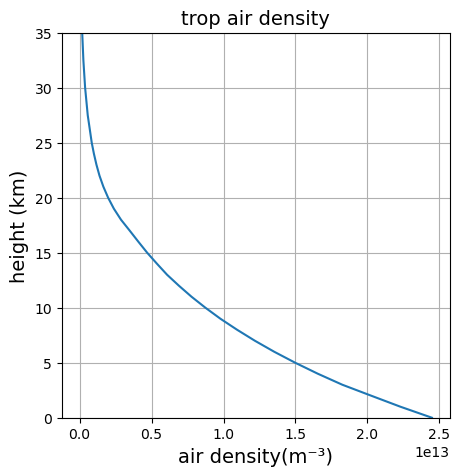

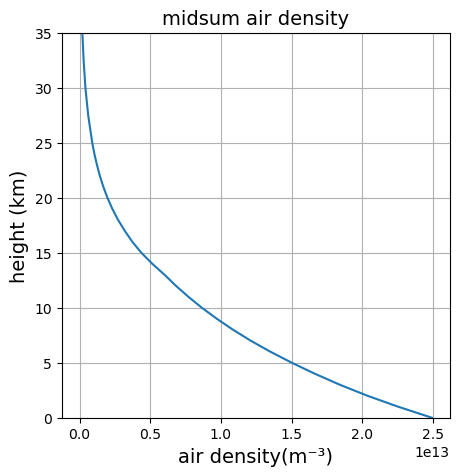

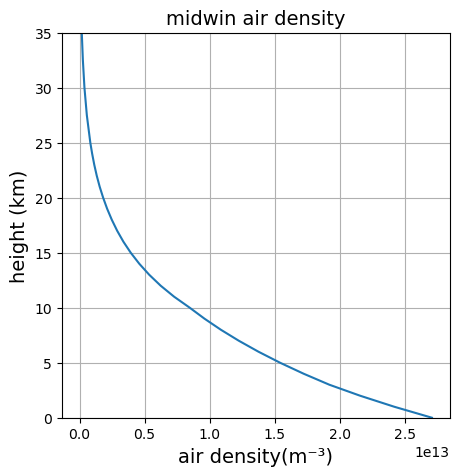

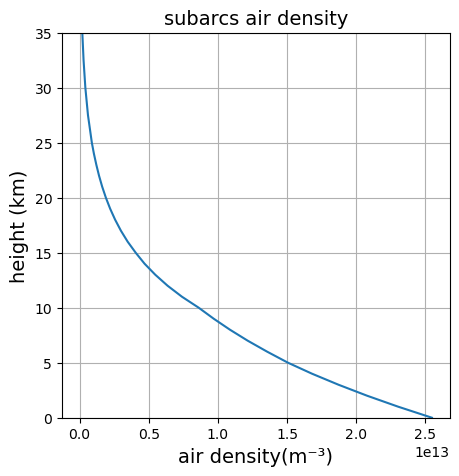

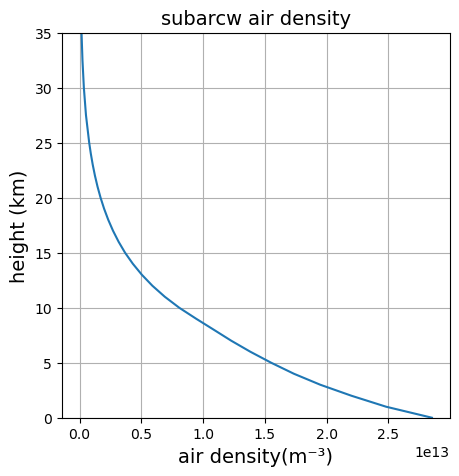

In [16]:
# air density -> that a weak dependency of density on latitude and season exists such that in summer at 200 km height
#the polar region density is 15% higher than at lower latitudes, while in winter the density decreases by 10% towards the pole

distribution(trop, trop['air density(m-3)'],35,'air density(m⁻³)', "trop air density")
distribution(midsum, midsum['air density(m-3)'], 35, 'air density(m⁻³)', 'midsum air density')
distribution(midwin, midwin['air density(m-3)'], 35, 'air density(m⁻³)', 'midwin air density')
distribution(subarcs, subarcs['air density(m-3)'], 35, 'air density(m⁻³)', 'subarcs air density')
distribution(subarcw, subarcw['air density(m-3)'], 35, 'air density(m⁻³)', 'subarcw air density')

In [17]:
# this part of code is kindly borrowed from my colleague

percentage = []
for file in [trop, midsum, midwin, subarcs, subarcw]:
    total_percent = [var / integration(file)[0] for var in integration(file)[1:]]
    percentage.append(total_percent)

# percentage[0] is a list with the total percentage of o3, o2, h20, co2 and no2 for tropical, 
# percentage[1] is the same for mid_summer etc.

o3 = []; o2 = []; h2o = []; co2 = []; no2 = [];
for i in percentage:
    o3.append(i[0] * 100)
    o2.append(i[1] * 100)
    h2o.append(i[2] * 100)
    co2.append(i[3] * 100)
    no2.append(i[4] * 100)

In [18]:
o3

[3.5204968793228864e-05,
 4.175281428906126e-05,
 4.708402087309024e-05,
 4.364260961108993e-05,
 4.7020808909324086e-05]

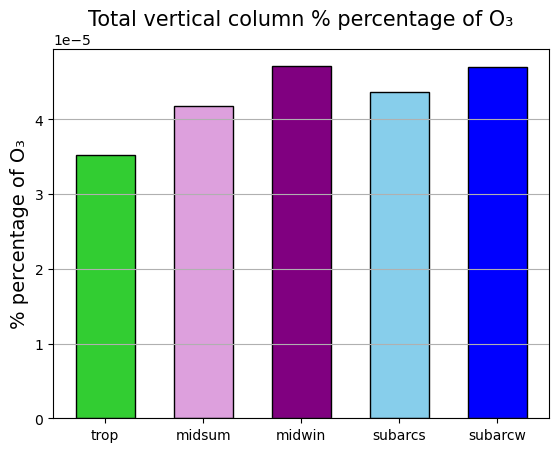

[3.5204968793228864e-05, 4.175281428906126e-05, 4.708402087309024e-05, 4.364260961108993e-05, 4.7020808909324086e-05]


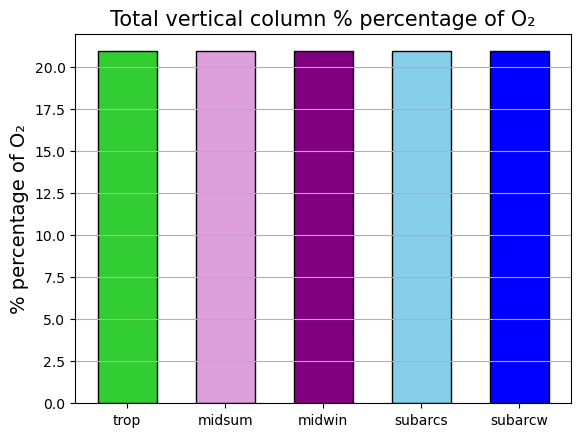

[20.915134686099275, 20.91392048892994, 20.914673942659554, 20.91479800437507, 20.916234070714136]


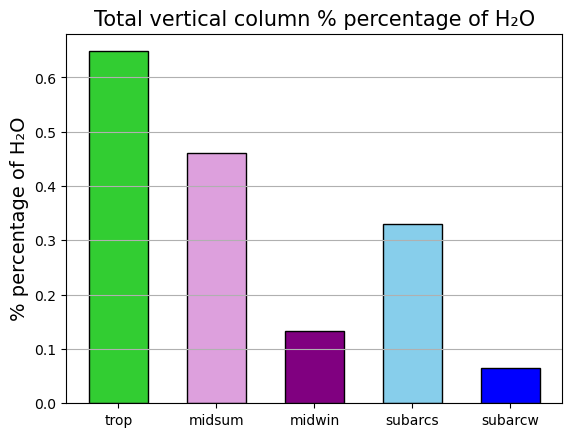

[0.6481130606346168, 0.4613342791940008, 0.13348631564534758, 0.329359357885572, 0.06539002614239138]


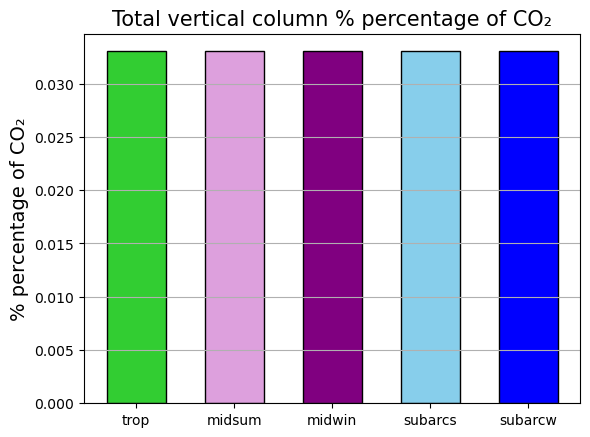

[0.03302389347033271, 0.033021977117110954, 0.03302316532279875, 0.03302336278385528, 0.03302562853025409]


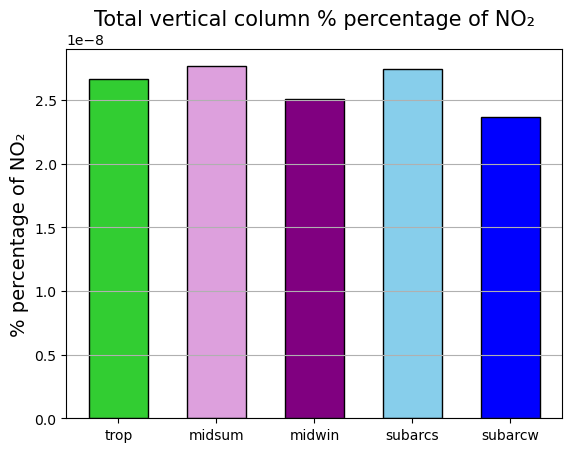

[2.6606714747127905e-08, 2.7633978942149302e-08, 2.506494538028855e-08, 2.743842150980429e-08, 2.3666269949228916e-08]


In [19]:
# bar plots
file_names = ['trop', 'midsum', 'midwin', 'subarcs', 'subarcw']
var_density_names = ['air density', 'O₃', 'O₂', 'H₂O', 'CO₂', 'NO₂']
colour = ['limegreen', 'plum', 'purple', 'skyblue', 'blue']

for count, var in enumerate([o3, o2, h2o, co2, no2]):
    plt.bar(file_names, var, color=colour, edgecolor ='black', width = 0.6)
    plt.ylabel(f'% percentage of {var_density_names[count+1]}',fontsize = 14)
    plt.title(f'Total vertical column % percentage of {var_density_names[count+1]}',fontsize=15)
    plt.grid(axis='y')
    plt.show()
    print(var)

In [20]:
# fractions 
trop['o2/air'] = trop['o2(m-3)']/trop['air density(m-3)']
midsum['o2/air'] = midsum['o2(m-3)']/midsum['air density(m-3)']
midwin['o2/air'] = midwin['o2(m-3)']/midwin['air density(m-3)']
subarcs['o2/air'] = subarcs['o2(m-3)']/subarcs['air density(m-3)']
subarcw['o2/air'] = subarcw['o2(m-3)']/subarcw['air density(m-3)']

Μένει να βρω το ποσοστό κάθε αερίου στην τροπόσφαιρα (το ίδιο πράγμα με τα bar plots αλλά όχι για το συνολικό ύψος, μόνο μέχρι την τροπόπαυση) και αν έχω χρόνο μπορώ να βάλω Ο3 και ΝΟ2 σε μία κοινή γραφική 

In [21]:
#df.drop(df.loc[df['line_race']==0].index, inplace=True)
trop.drop(trop.loc[(trop['z(km)']>45) & (trop['z(km)']<18)].index, inplace=True)
midsum.drop(midsum.loc[midsum['z(km)']>18 & (midsum['z(km)']<45)].index, inplace=True)
midwin.drop(midwin.loc[midwin['z(km)']>30 & (midwin['z(km)']<45)].index, inplace=True)
subarcs.drop(subarcs.loc[subarcs['z(km)']>24 & (subarcs['z(km)']<45)].index, inplace=True)
subarcw.drop(subarcw.loc[subarcw['z(km)']>25 & (subarcw['z(km)']<55)].index, inplace=True)

In [22]:
percentage = []
for file in [trop, midsum, midwin, subarcs, subarcw]:
    total_percent = [var / integration(file)[0] for var in integration(file)[1:]]
    percentage.append(total_percent)

# percentage[0] is a list with the total percentage of o3, o2, h20, co2 and no2 for tropical, 
# percentage[1] is the same for mid_summer etc.

o3 = []; o2 = []; h2o = []; co2 = []; no2 = [];
for i in percentage:
    o3.append(i[0] * 100)
    o2.append(i[1] * 100)
    h2o.append(i[2] * 100)
    co2.append(i[3] * 100)
    no2.append(i[4] * 100)

C:\Users\nadia\AppData\Local\Temp\ipykernel_8476\1797413140.py:3: RuntimeWarning: invalid value encountered in double_scalars
  total_percent = [var / integration(file)[0] for var in integration(file)[1:]]


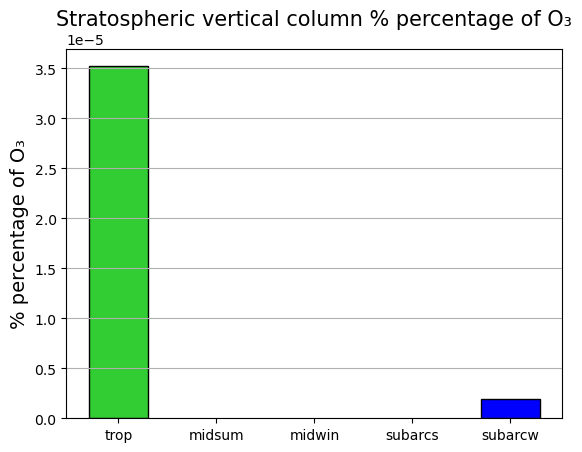

[3.5204968793228864e-05, nan, nan, nan, 1.92927348628839e-06]


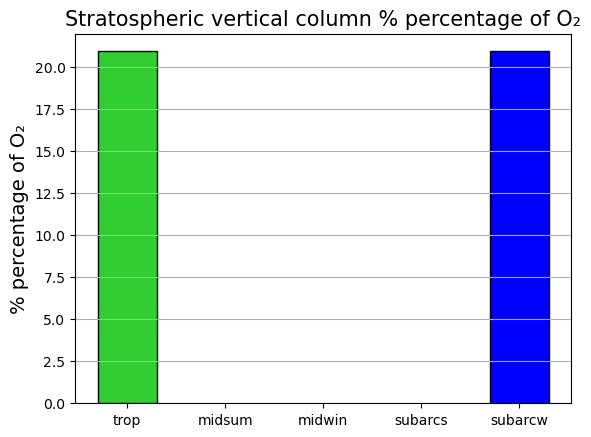

[20.915134686099275, nan, nan, nan, 20.91794029755057]


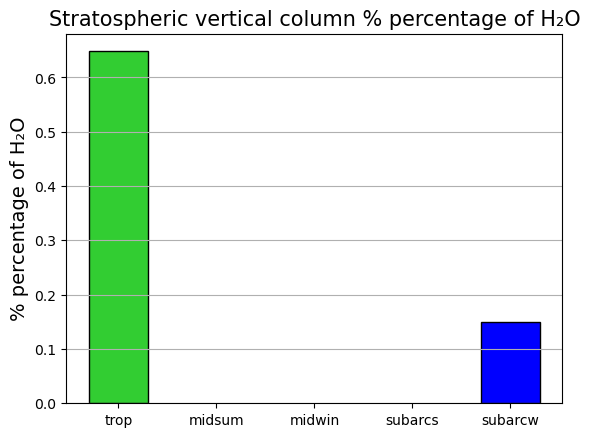

[0.6481130606346168, nan, nan, nan, 0.1503993591806871]


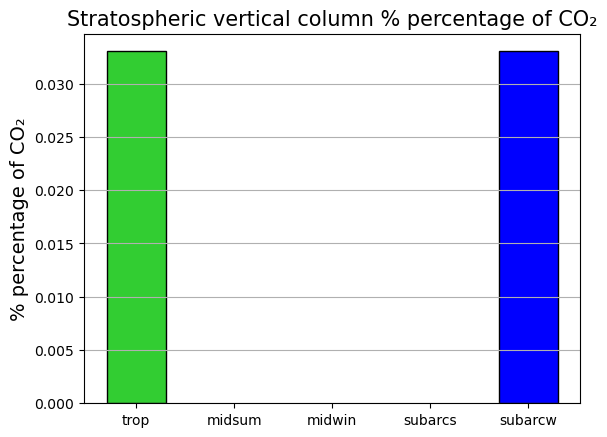

[0.03302389347033271, nan, nan, nan, 0.03302832678560616]


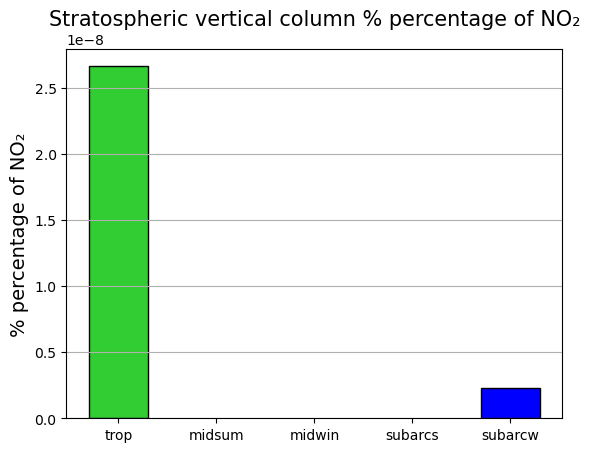

[2.6606714747127905e-08, nan, nan, nan, 2.3019742911180053e-09]


In [23]:
# bar plots
file_names = ['trop', 'midsum', 'midwin', 'subarcs', 'subarcw']
var_density_names = ['air density', 'O₃', 'O₂', 'H₂O', 'CO₂', 'NO₂']
colour = ['limegreen', 'plum', 'purple', 'skyblue', 'blue']

for count, var in enumerate([o3, o2, h2o, co2, no2]):
    plt.bar(file_names, var, color=colour, edgecolor ='black', width = 0.6)
    plt.ylabel(f'% percentage of {var_density_names[count+1]}',fontsize = 14)
    plt.title(f'Stratospheric vertical column % percentage of {var_density_names[count+1]}',fontsize=15)
    plt.grid(axis='y')
    plt.show()
    print(var)

In [30]:
#df.drop(df.loc[df['line_race']==0].index, inplace=True)
trop.drop(trop.loc[trop['z(km)']>20].index, inplace=True)
midsum.drop(midsum.loc[midsum['z(km)']>20].index, inplace=True)
midwin.drop(midwin.loc[midwin['z(km)']>20].index, inplace=True)
subarcs.drop(subarcs.loc[subarcs['z(km)']>20].index, inplace=True)
subarcw.drop(subarcw.loc[subarcw['z(km)']>20].index, inplace=True)

In [31]:
percentage = []
for file in [trop, midsum, midwin, subarcs, subarcw]:
    total_percent = [var / integration(file)[0] for var in integration(file)[1:]]
    percentage.append(total_percent)

# percentage[0] is a list with the total percentage of o3, o2, h20, co2 and no2 for tropical, 
# percentage[1] is the same for mid_summer etc.

o3 = []; o2 = []; h2o = []; co2 = []; no2 = [];
for i in percentage:
    o3.append(i[0] * 100)
    o2.append(i[1] * 100)
    h2o.append(i[2] * 100)
    co2.append(i[3] * 100)
    no2.append(i[4] * 100)

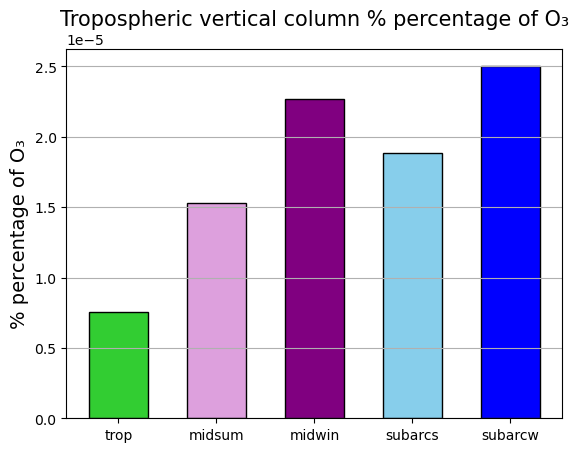

[7.521259513291826e-06, 1.5287305996833647e-05, 2.2712458463168927e-05, 1.883852629429515e-05, 2.5010258267917407e-05]


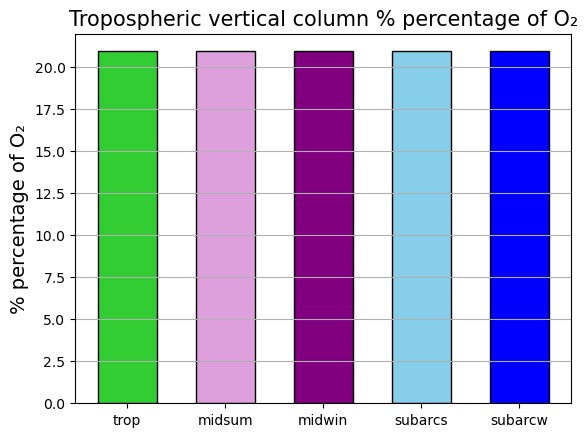

[20.915219031435075, 20.91403879051843, 20.91460309323962, 20.91472788093613, 20.91630932880922]


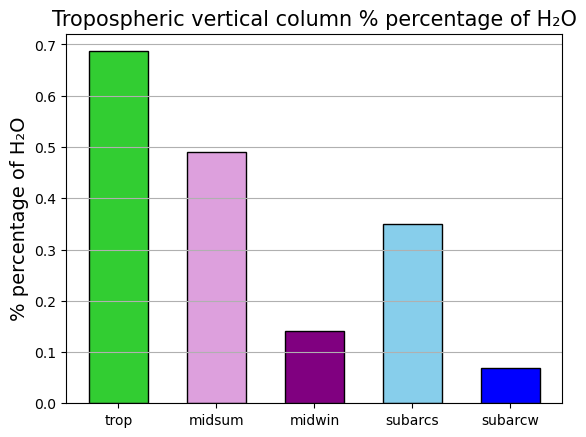

[0.6867567505235355, 0.49038817242864063, 0.14097593326749505, 0.35000753403189994, 0.06880918397346512]


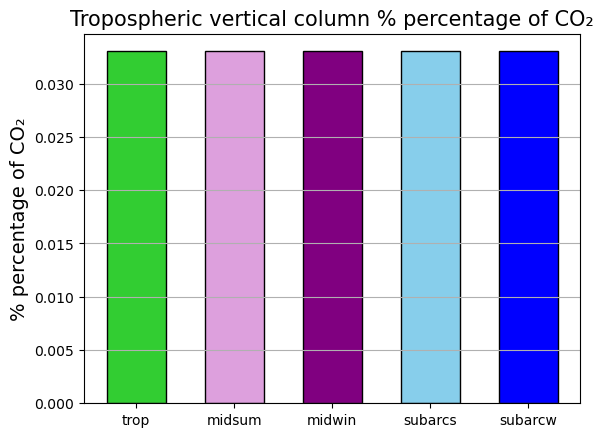

[0.03302402956030821, 0.03302216651134489, 0.0330230575156415, 0.033023254626939544, 0.03302575157180403]


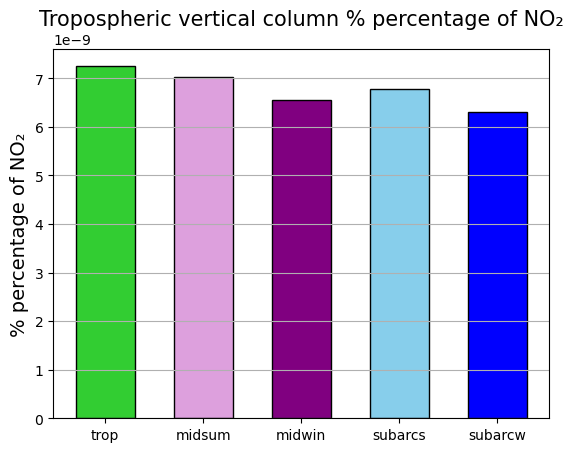

[7.248734959255882e-09, 7.021836523761505e-09, 6.555744175660131e-09, 6.785938915738237e-09, 6.298159166461476e-09]


In [32]:
# bar plots
file_names = ['trop', 'midsum', 'midwin', 'subarcs', 'subarcw']
var_density_names = ['air density', 'O₃', 'O₂', 'H₂O', 'CO₂', 'NO₂']
colour = ['limegreen', 'plum', 'purple', 'skyblue', 'blue']

for count, var in enumerate([o3, o2, h2o, co2, no2]):
    plt.bar(file_names, var, color=colour, edgecolor ='black', width = 0.6)
    plt.ylabel(f'% percentage of {var_density_names[count+1]}',fontsize = 14)
    plt.title(f'Tropospheric vertical column % percentage of {var_density_names[count+1]}',fontsize=15)
    plt.grid(axis='y')
    plt.show()
    print(var)